# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 31     |  |
| :-------------|:-------------|
| Student Julia van der Maaten| Student 6505937|
| Student Thomas de Ruyter van Steveninck | Student 6528255 |
| Student Lieke Boontjes| Student 65437155 |

| Planning Groep: 31     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | voor de lunch |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 14:30 |
| Pauze 1| 12:30-13:30 |
| Pauze 2| Tijdspanne |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Schetsen.jpg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|druksensor | aantal mensen in collegezaal tellen door druk op stoelen te meten | Een kleine aanpassing aan de criteria na onze eerste iteratie. (We meten nu dus het gewicht van flessen.) 1) De sensor moet kunnen meten in een bereik van 0-500 gram 2) Er moet een merkbaar verschil zijn tussen flessen die 50 gram verschillen in gewicht met een errormarge van 10 gram 3) De fles moet stabiel op de sensor blijven staan. Hij moet dus blijven staan zonder dat deze vastgehouden wordt.
|tempratuursensor | koortsmeten | 1) verschil tussen normaal lichaamstempratuur en tempratuur bij koorts 2)Hij moet niet worden beinvloed door de zon 3) de omgefvingtempratuur mag geen invloed hebben |
|lichtsensor |automatisch nachtlampje | 1)bij donker gaat het lichtje aan, verschil tussen echt donker en schemer donker 2) Niet een schommelde waarde geven, anders gaat het lampje knipperen 3) hoe donkerder de kamer hoe minder fel licht en bij schemer is het lampje feller|
 

Groep 31 heeft gekozen voor sensor druksensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Opstellingschets3.jpg "schets student")
In deze foto zijn onze schetsen van de kalibratieopstelling en uitleg te zien

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? gewicht op de plank
2. Over welk bereik ga je deze variabelen veranderen? 0-60 kg
3. Wat ga je allemaal meten?  persoon (60kg), tas(10 kg), niks.
4. Hoeveel metingen ga je doen? 3 of 4
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? ja


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Meetopstelling2.jpg "meetopstelling student")
 Hierin is de meetopstleling te zien, de druksensor is hierbij tussen 2 planken geplaatst. op de bovenste plank is een waterfles geplaatst

Opmerking: we zijn gewisseld van het meten of er een persoon op de stoel zit naar maken van een weegschaal omdat er geen weegschaal beschikbaar was om te kunnen kalibreren boven de 610 g. 

Meetplan:
1. Welke variabelen ga je veranderen? gewicht op de plank/weegschaal
2. Over welk bereik ga je deze variabelen veranderen? 0-500 g
3. Wat ga je allemaal meten? van 0 tot 500 gram in intervallen van 50g.
4. Hoeveel metingen ga je doen? 11 metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? ja


## *Opdracht 6*: Meten en fitten, Leerdoel

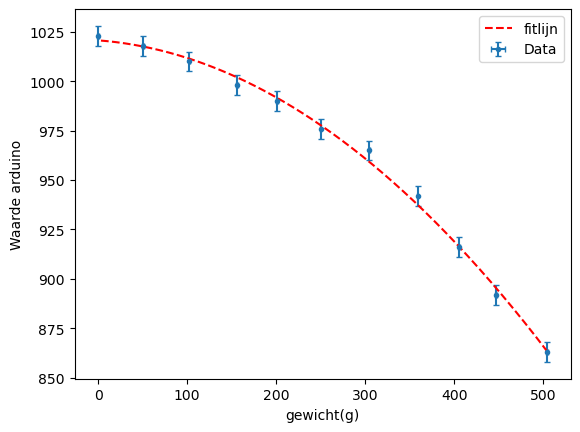

In [72]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

gewichten = np.array([0, 50, 102.48, 156, 201.13, 249.83, 304.75, 358.8, 404.98, 447.16, 504.67]) #g
arduino = np.array([1023, 1018, 1010, 998, 990, 976, 965, 942, 916, 892, 863 ])

u_gewichten = 1
u_arduino = 5
%matplotlib inline

def fitfunctie(x, a, b, c):
    return a * x**2 + b * x + c

#curvefitten
vals, covals = curve_fit(fitfunctie, gewichten, arduino)
u_fit = np.sqrt(np.diag(covals) / len(gewichten))

x_test = np.linspace(max(gewichten), min(gewichten), 1000)

plt.figure()
plt.errorbar(gewichten, arduino, xerr=u_gewichten, yerr=u_arduino, fmt='.',capsize=2, label="Data")
plt.plot(x_test, fitfunctie(x_test, *vals),'r--',label='fitlijn')
plt.xlabel("gewicht(g)")
plt.ylabel("Waarde arduino")
plt.legend()
plt.show()

## *Opdracht 7*: Iteratie nodig?

In ons eerste meetplan wilden we kijken of we konden zeggen of iemand op een stoel zat of niet. Helaas was de benodige meetapparatur er niet, de personenweegschaal was er niet. Dus toen hebben we ons plan aangepast zodat de gewichten die we gingen meten in het bereik van de weegschaal waren. Ook hebben we de opstelling van onze druksensor steeds net een beetje verandert zodat we er makkelijker mee konden werken en hij de juiste waardes teruggaf. 

Een kleine aanpassing aan de criteria na onze eerste iteratie. (We meten nu dus het gewicht van flessen.)
1) De sensor moet kunnen meten in een bereik van 0-500 gram
2) Er moet een merkbaar verschil zijn tussen flessen die 50 gram verschillen in gewicht met een errormarge van 10 gram
3) De fles moet stabiel op de sensor blijven staan. Hij moet dus blijven staan zonder dat deze vastgehouden wordt.

## *Opdracht 8*: Conclusie, leerdoel

De conclusie die wij uit onze gegevens halen is dat je met de druksensor en de gevonden fit waardes de arduino waarde direct kan koppelen aan een specifiek gewicht. Daarmee kunnen we ook stellen dat onze eerste iteratie waarschijnlijk ook werkt en dat je dus onderscheid kan maken tussen een tas en een mens op een stoel. Mogelijk moet je hiervoor wel de weerstand aanpassen omdat je dan in een ander bereik meet.
Om terug te komen op de critera die we hierboven hebben genoemd.
1. De sensor kan accuraat meten of er een object op de sensor staat. (gemeten vanaf 20 gram en meer getest)
2. De sensor is accuraat genoeg om in het bereik van 0 tot 600 gram meetwaardes te geven om een fit te maken waaruit de sensor gekalibreerd kon worden.
3. De fles kon makkelijk op de opstelling gezet worden zoder dat de fles omviel.



## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Opstellingschets3.jpg "schets student")
In deze foto zijn onze schetsen van de kalibratieopstelling en uitleg te zien

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Meetopstelling2.jpg "meetopstelling student")
 Hierin is de meetopstleling te zien, de druksensor is hierbij tussen 2 planken geplaatst. op de bovenste plank is een waterfles geplaatst

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.


## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|druksensor | aantal mensen in collegezaal tellen door druk op stoelen te meten | Een kleine aanpassing aan de criteria na onze eerste iteratie. (We meten nu dus het gewicht van flessen.) 1) De sensor moet kunnen meten in een bereik van 0-500 gram 2) Er moet een merkbaar verschil zijn tussen flessen die 50 gram verschillen in gewicht met een errormarge van 10 gram 3) De fles moet stabiel op de sensor blijven staan. Hij moet dus blijven staan zonder dat deze vastgehouden wordt.
|tempratuursensor | koortsmeten | 1) verschil tussen normaal lichaamstempratuur en tempratuur bij koorts 2)Hij moet niet worden beinvloed door de zon 3) de omgefvingtempratuur mag geen invloed hebben |
|lichtsensor |automatisch nachtlampje | 1)bij donker gaat het lichtje aan, verschil tussen echt donker en schemer donker 2) Niet een schommelde waarde geven, anders gaat het lampje knipperen 3) hoe donkerder de kamer hoe minder fel licht en bij schemer is het lampje feller|
 

Groep 31 heeft gekozen voor sensor druksensor. 

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Zie hiervoor de opdrachten 3, 5, 6 en 8 .

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Opstellingschets3.jpg "schets student")
In deze foto zijn onze schetsen van de kalibratieopstelling en uitleg te zien

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Meetopstelling2.jpg "meetopstelling student")
 Hierin is de meetopstleling te zien, de druksensor is hierbij tussen 2 planken geplaatst. op de bovenste plank is een waterfles geplaatst

## *Opdracht 8*: Conclusie, leerdoel

De conclusie die wij uit onze gegevens halen is dat je met de druksensor en de gevonden fit waardes de arduino waarde direct kan koppelen aan een specifiek gewicht. Daarmee kunnen we ook stellen dat onze eerste iteratie waarschijnlijk ook werkt en dat je dus onderscheid kan maken tussen een tas en een mens op een stoel. Mogelijk moet je hiervoor wel de weerstand aanpassen omdat je dan in een ander bereik meet.
Om terug te komen op de critera die we hierboven hebben genoemd.
1. De sensor kan accuraat meten of er een object op de sensor staat. (gemeten vanaf 20 gram en meer getest)
2. De sensor is accuraat genoeg om in het bereik van 0 tot 600 gram meetwaardes te geven om een fit te maken waaruit de sensor gekalibreerd kon worden.
3. De fles kon makkelijk op de opstelling gezet worden zoder dat de fles omviel.



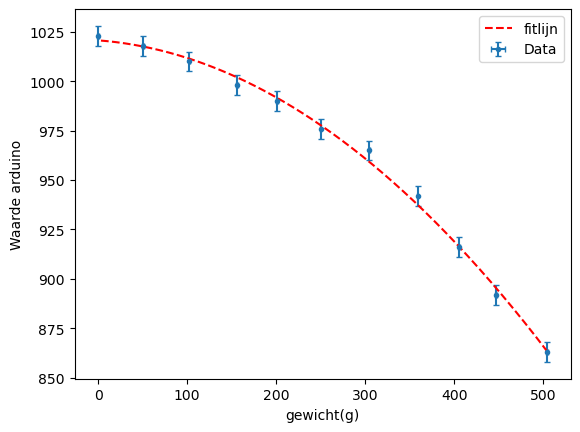

In [73]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

gewichten = np.array([0, 50, 102.48, 156, 201.13, 249.83, 304.75, 358.8, 404.98, 447.16, 504.67]) #g
arduino = np.array([1023, 1018, 1010, 998, 990, 976, 965, 942, 916, 892, 863 ])

u_gewichten = 1
u_arduino = 5
%matplotlib inline

def fitfunctie(x, a, b, c):
    return a * x**2 + b * x + c

#curvefitten
vals, covals = curve_fit(fitfunctie, gewichten, arduino)
u_fit = np.sqrt(np.diag(covals) / len(gewichten))

x_test = np.linspace(max(gewichten), min(gewichten), 1000)

plt.figure()
plt.errorbar(gewichten, arduino, xerr=u_gewichten, yerr=u_arduino, fmt='.',capsize=2, label="Data")
plt.plot(x_test, fitfunctie(x_test, *vals),'r--',label='fitlijn')
plt.xlabel("gewicht(g)")
plt.ylabel("Waarde arduino")
plt.legend()
plt.show()